# Life Expectancy Analysis and Prediction

## Importing Necessary Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.inspection import permutation_importance
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('/kaggle/input/life-expectancy-who/Life Expectancy Data.csv')
data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
print(data.head())

       Country  Year      Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015  Developing              65.0            263.0   
1  Afghanistan  2014  Developing              59.9            271.0   
2  Afghanistan  2013  Developing              59.9            268.0   
3  Afghanistan  2012  Developing              59.5            272.0   
4  Afghanistan  2011  Developing              59.2            275.0   

   infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
0             62     0.01               71.279624         65.0      1154  ...   
1             64     0.01               73.523582         62.0       492  ...   
2             66     0.01               73.219243         64.0       430  ...   
3             69     0.01               78.184215         67.0      2787  ...   
4             71     0.01                7.097109         68.0      3013  ...   

   Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP  Population  \
0    6.

In [4]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [5]:
print(data.describe())

              Year  Life expectancy   Adult Mortality  infant deaths  \
count  2938.000000       2928.000000      2928.000000    2938.000000   
mean   2007.518720         69.224932       164.796448      30.303948   
std       4.613841          9.523867       124.292079     117.926501   
min    2000.000000         36.300000         1.000000       0.000000   
25%    2004.000000         63.100000        74.000000       0.000000   
50%    2008.000000         72.100000       144.000000       3.000000   
75%    2012.000000         75.700000       228.000000      22.000000   
max    2015.000000         89.000000       723.000000    1800.000000   

           Alcohol  percentage expenditure  Hepatitis B       Measles   \
count  2744.000000             2938.000000  2385.000000    2938.000000   
mean      4.602861              738.251295    80.940461    2419.592240   
std       4.052413             1987.914858    25.070016   11467.272489   
min       0.010000                0.000000     1.000000

#### Listing the name of columns in the Dataset

In [6]:
print(list(data.columns))

['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling']


## Data Pre-processing

#### Checking for Missing Values

In [7]:
print("\nMissing Values Count:")
print(data.isnull().sum())


Missing Values Count:
Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


#### Handling Missing Values

In [8]:
# Identify columns with missing values
missing_values = data.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0].index.tolist()

In [9]:
# Using SimpleImputer to fill missing values
imputer = SimpleImputer(strategy='mean')  # You can choose other strategies like 'median', 'most_frequent', etc.
data[columns_with_missing_values] = imputer.fit_transform(data[columns_with_missing_values])

# Confirm that there are no more missing values
print("\nData Info after handling missing values:")
print(data.info())


Data Info after handling missing values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2938 non-null   float64
 4   Adult Mortality                  2938 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2938 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2938 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2938 non-null   float64
 11  under-five deaths                2938 no

#### One-Hot Encoding of Categorical Variables

In [10]:
# Encoding 'Status' column using LabelEncoder
le = LabelEncoder()
data['Status'] = le.fit_transform(data['Status'])

#### Feature Scaling

In [11]:
# List of numerical features to scale
numerical_features = ['Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 
                      'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', 
                      ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 
                      'Income composition of resources', 'Schooling']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
data[numerical_features] = scaler.fit_transform(data[numerical_features])

# Display the first few rows of the preprocessed data
print("\nPreprocessed Data Head:")
print(data.head())

# Save the preprocessed data to a new CSV file (optional)
data.to_csv('Preprocessed_Life_Expectancy_Data.csv', index=False)


Preprocessed Data Head:
       Country  Year  Status  Life expectancy   Adult Mortality  \
0  Afghanistan  2015       1              65.0         0.791586   
1  Afghanistan  2014       1              59.9         0.856072   
2  Afghanistan  2013       1              59.9         0.831890   
3  Afghanistan  2012       1              59.5         0.864132   
4  Afghanistan  2011       1              59.2         0.888314   

   infant deaths   Alcohol  percentage expenditure  Hepatitis B  Measles   \
0       0.268824 -1.172958               -0.335570    -0.705861 -0.110384   
1       0.285786 -1.172958               -0.334441    -0.838704 -0.168124   
2       0.302749 -1.172958               -0.334594    -0.750142 -0.173531   
3       0.328193 -1.172958               -0.332096    -0.617299  0.032045   
4       0.345155 -1.172958               -0.367862    -0.573018  0.051757   

   ...     Polio  Total expenditure  Diphtheria    HIV/AIDS       GDP  \
0  ... -3.278638           0.925806 

## Exploratoratory Data Analysis

#### Visualize the distribution of the target variable 'Life expectancy'

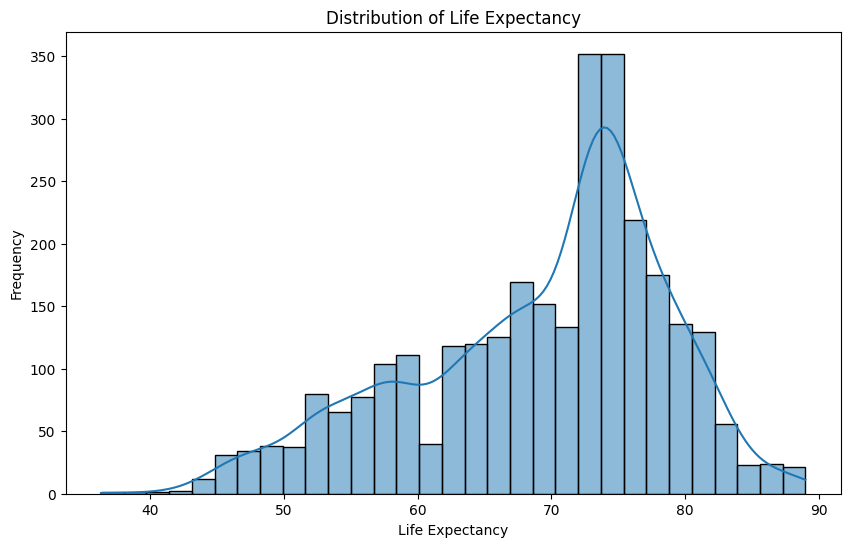

In [12]:
data = pd.read_csv('Preprocessed_Life_Expectancy_Data.csv')
plt.figure(figsize=(10, 6))
sns.histplot(data['Life expectancy '], kde=True)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life Expectancy')
plt.ylabel('Frequency')
plt.show()

### Correlation matrix to identify relationships between variables

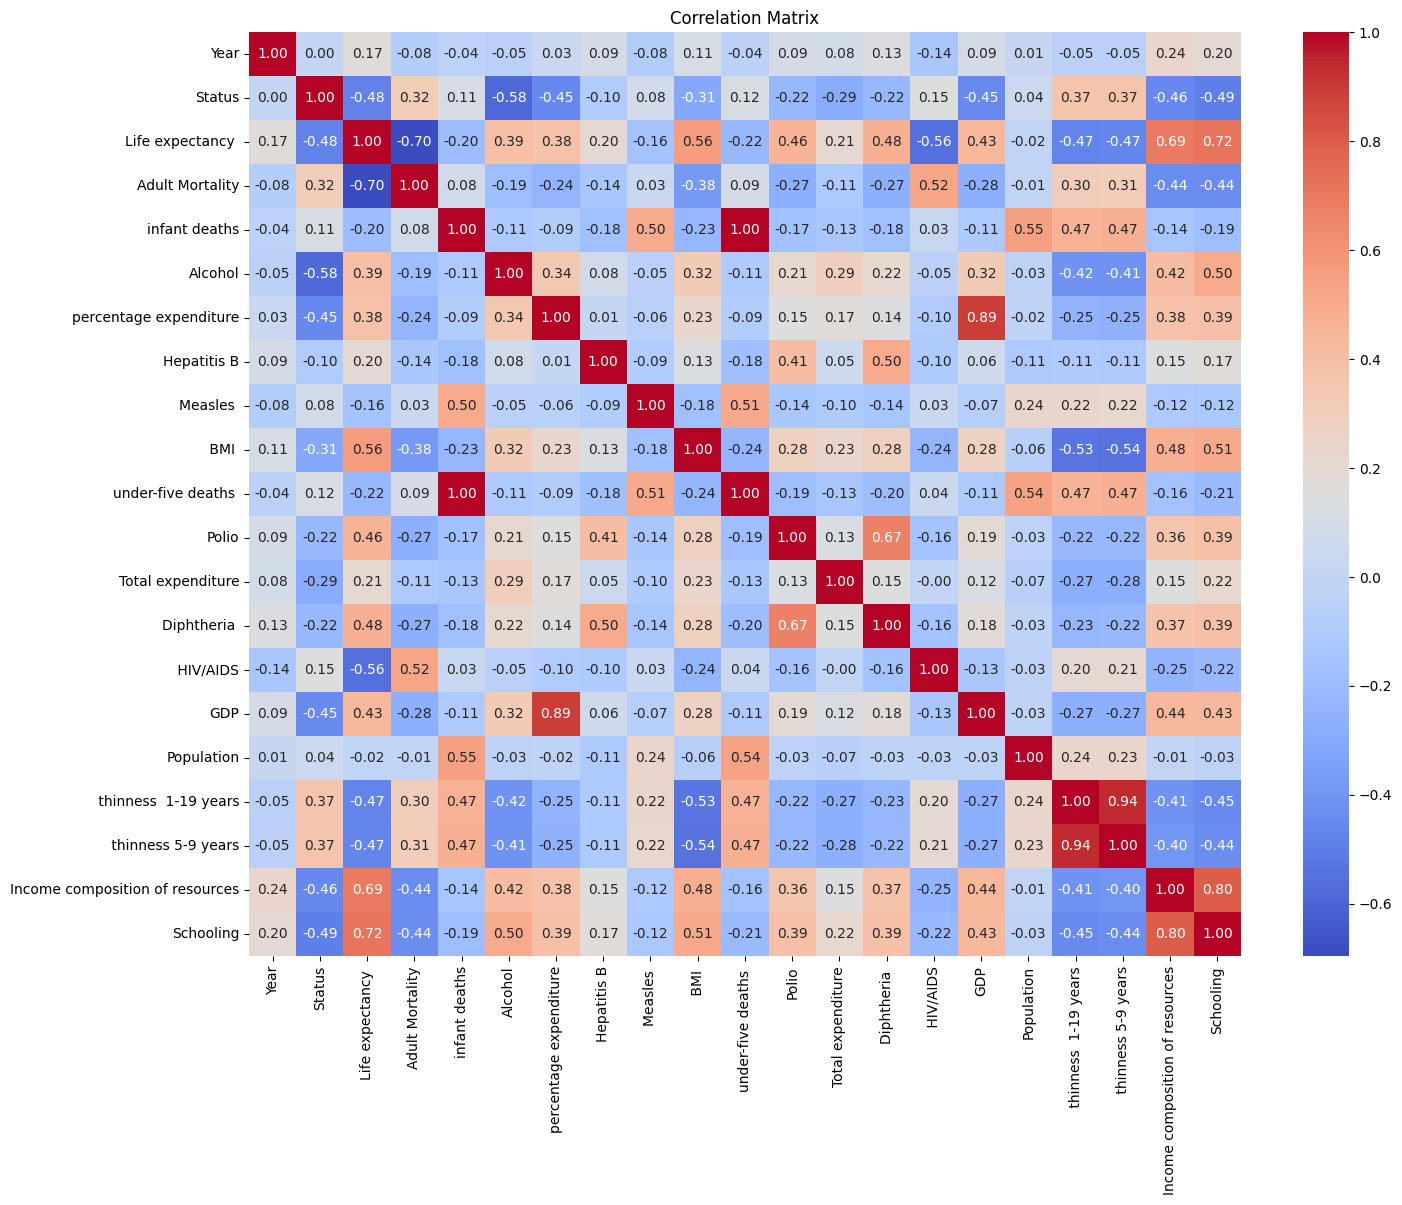

In [13]:
plt.figure(figsize=(16, 12))
numeric_data = data.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_data.corr()
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Pairplot to visualize relationships between a subset of variables

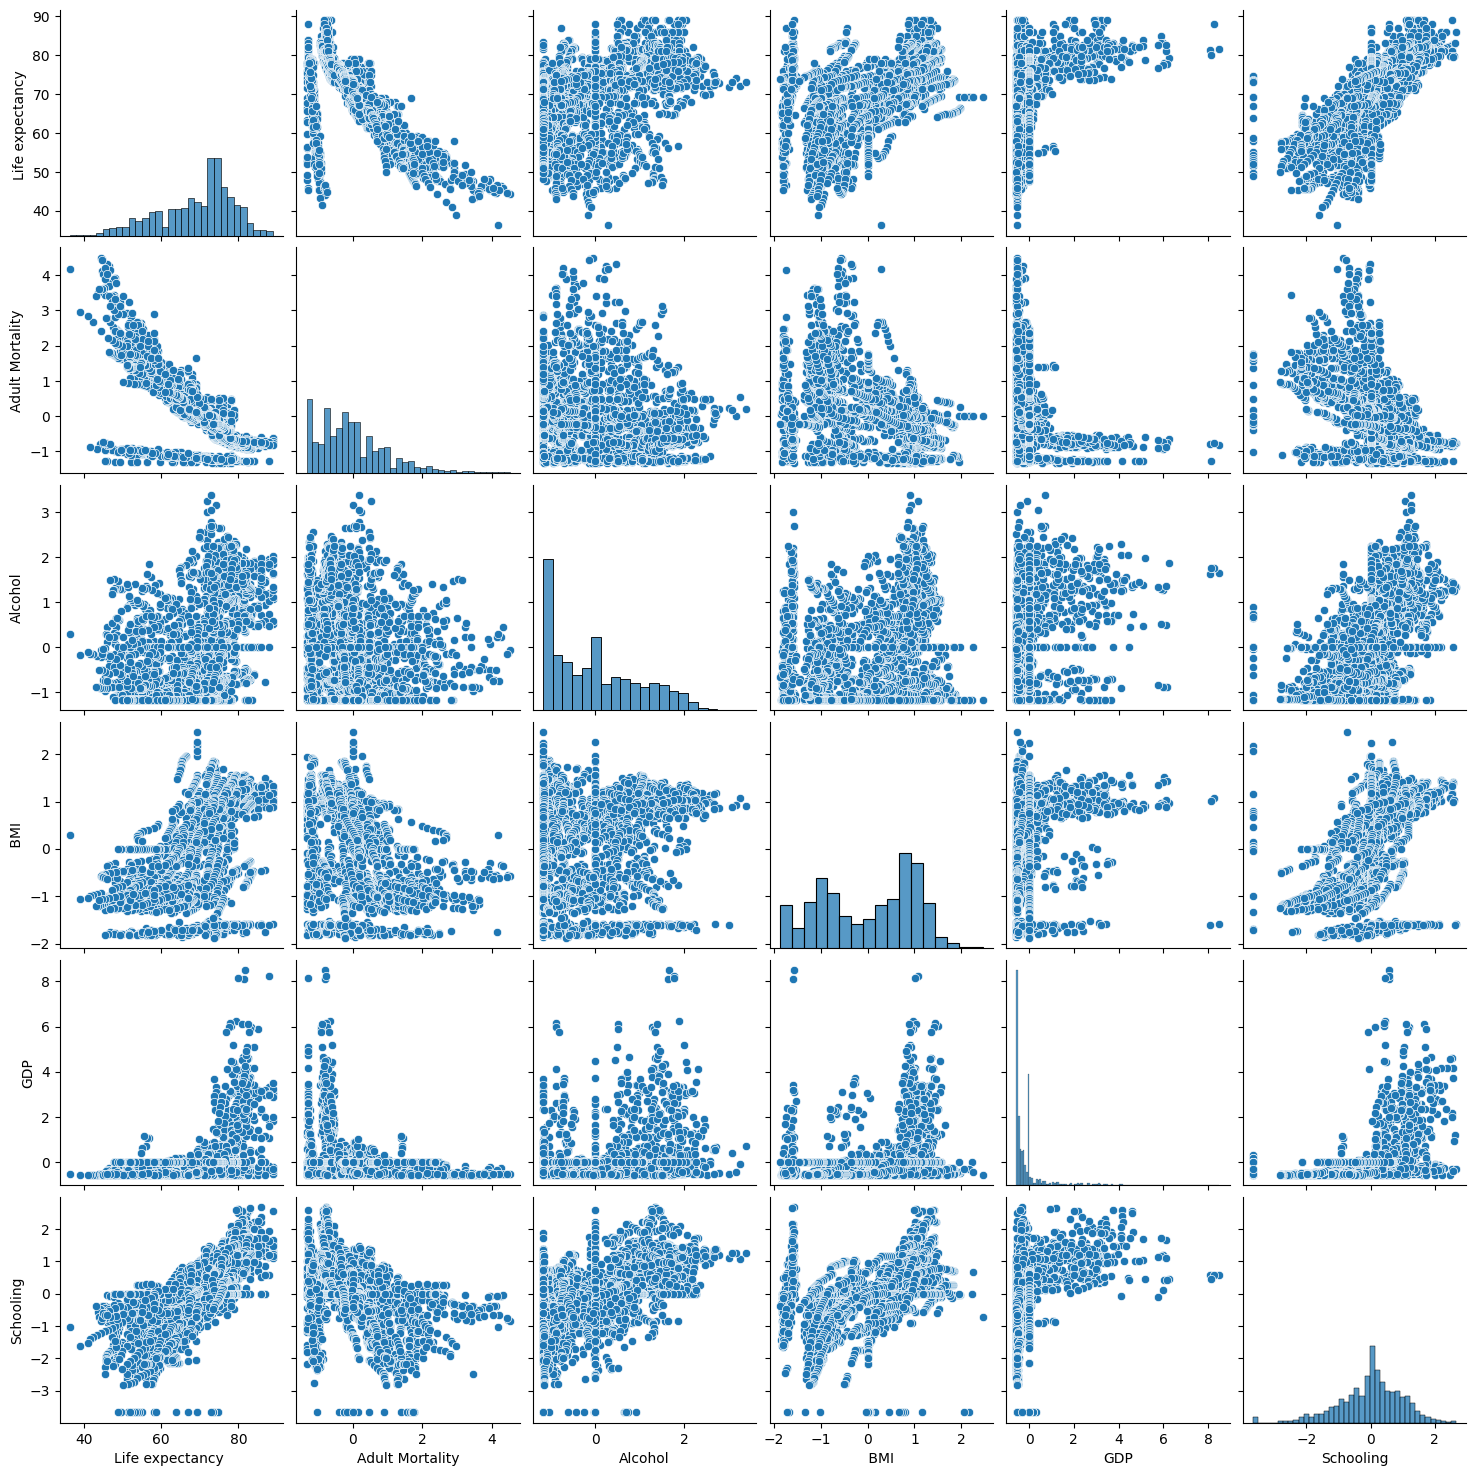

In [14]:
selected_features = ['Life expectancy ', 'Adult Mortality', 'Alcohol', ' BMI ', 'GDP', 'Schooling']
sns.pairplot(data[selected_features])
plt.show()

### Box plots to observe the distribution of 'Life expectancy' across different categories of 'Status'

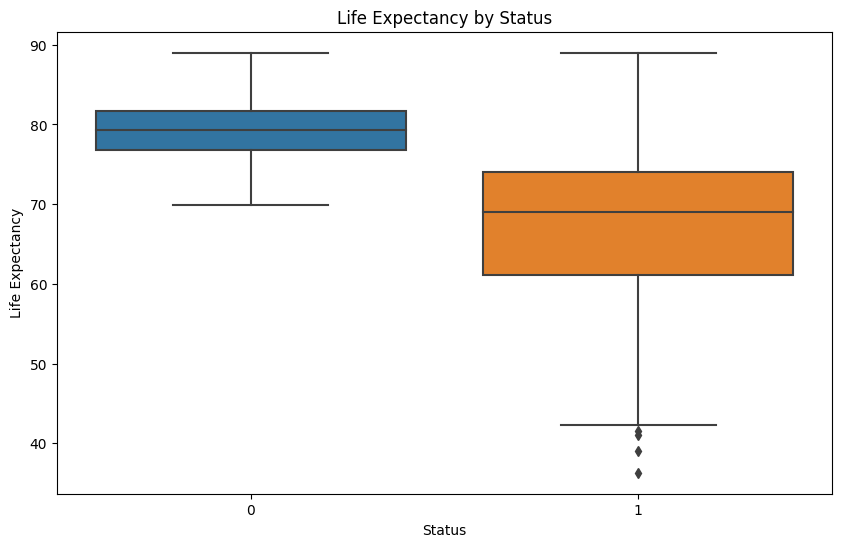

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Status', y='Life expectancy ', data=data)
plt.title('Life Expectancy by Status')
plt.xlabel('Status')
plt.ylabel('Life Expectancy')
plt.show()

### Scatter plots to examine the relationships between 'Life expectancy' and key numerical features

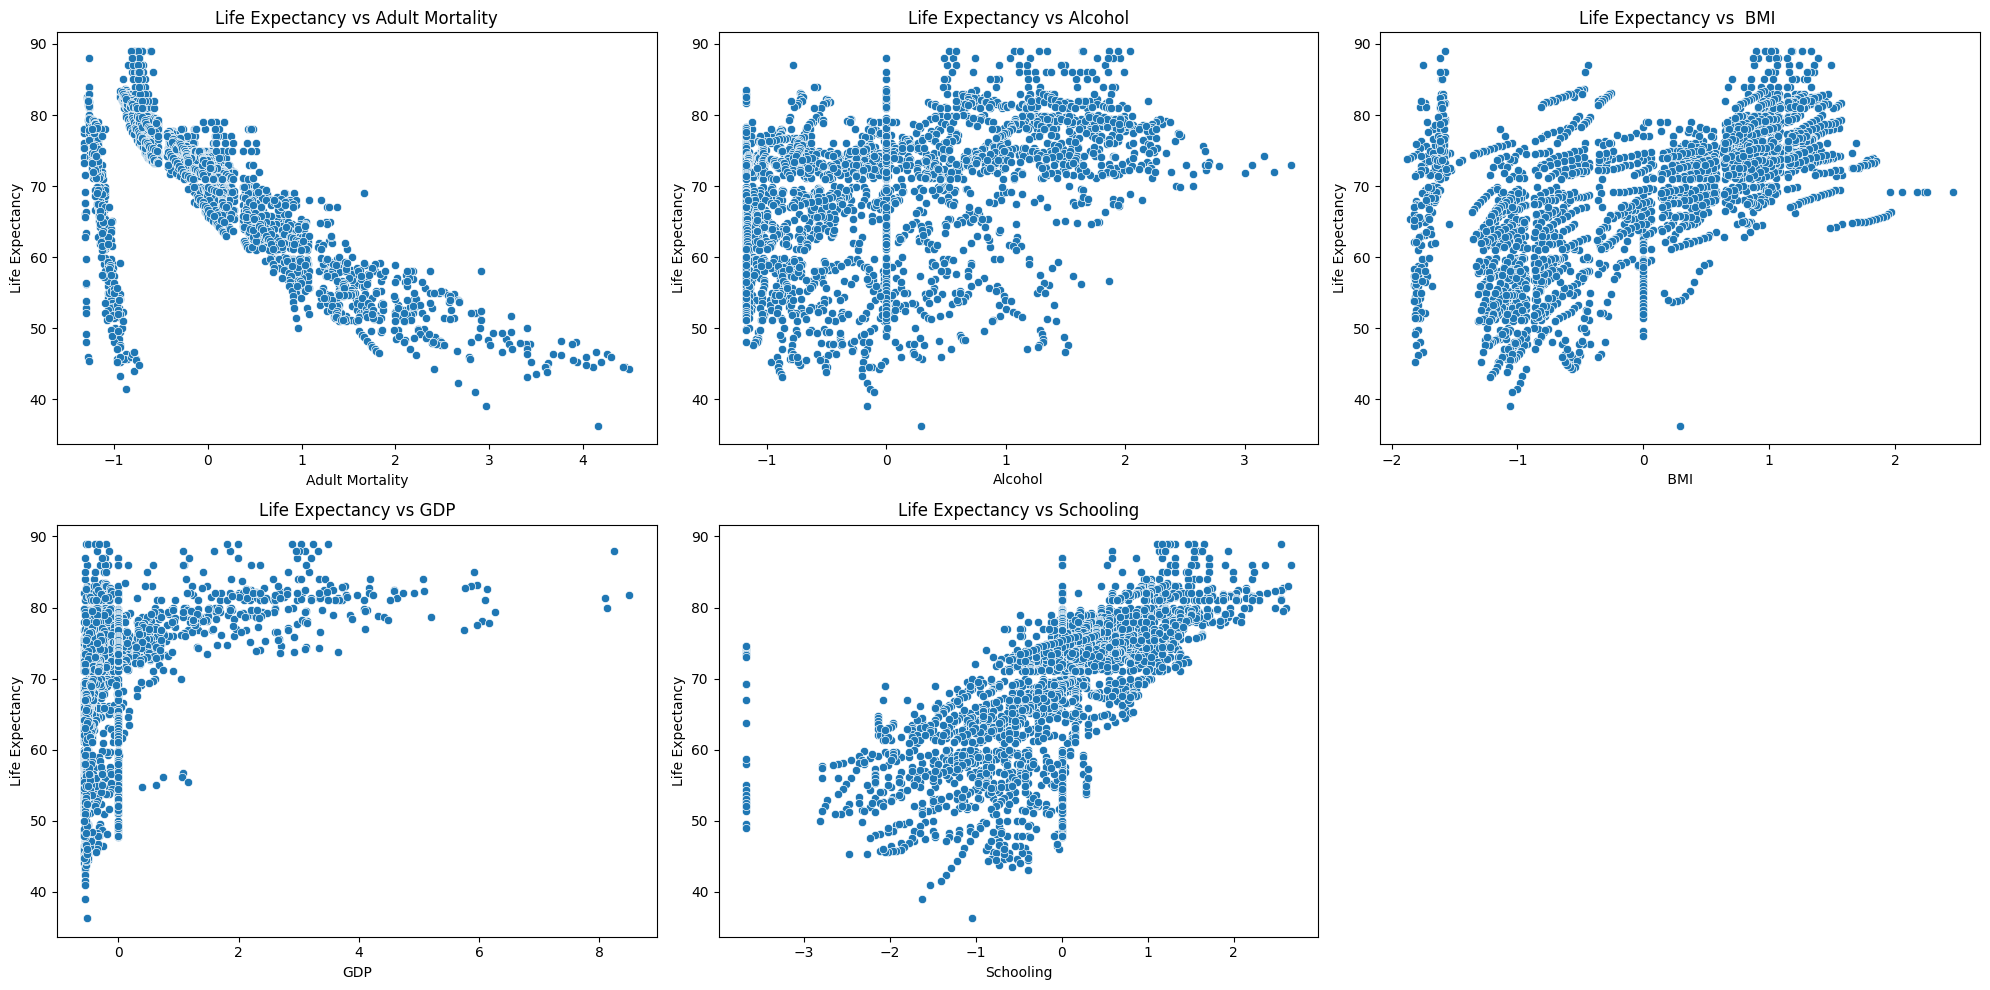

In [16]:
numerical_features = ['Adult Mortality', 'Alcohol', ' BMI ', 'GDP', 'Schooling']

plt.figure(figsize=(20, 10))
for i, feature in enumerate(numerical_features):
    plt.subplot(2, 3, i + 1)
    sns.scatterplot(x=feature, y='Life expectancy ', data=data)
    plt.title(f'Life Expectancy vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Life Expectancy')

plt.tight_layout()
plt.show()

### Distribution of categorical variable 'Status'

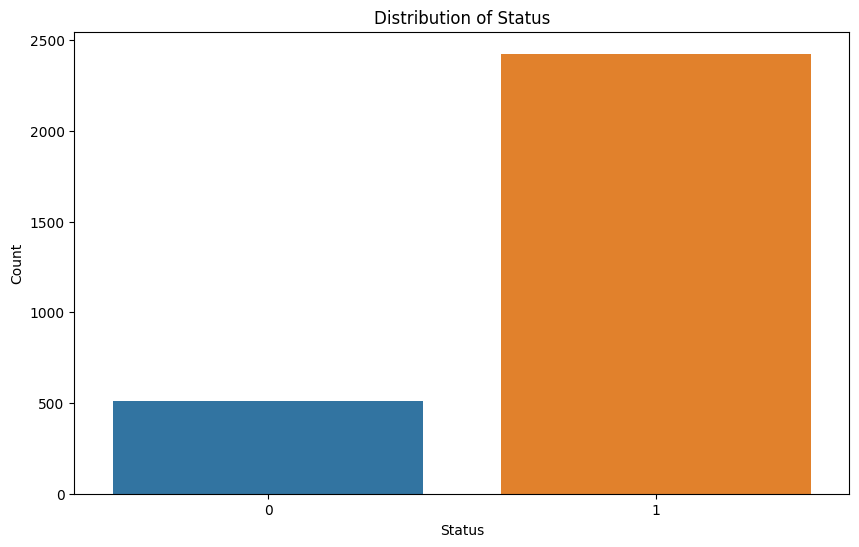

In [17]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Status', data=data)
plt.title('Distribution of Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
X = data.drop(['Life expectancy ', 'Country'], axis=1)
y = data['Life expectancy ']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Selection

In [19]:
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Gradient Boosting': GradientBoostingRegressor()
}

# Train and evaluate models
model_performance = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    model_performance[name] = {'MSE': mse, 'R2': r2}
    print(f'{name} - MSE: {mse}, R2: {r2}')

# Select the best model based on R2 score
best_model_name = max(model_performance, key=lambda x: model_performance[x]['R2'])
best_model = models[best_model_name]

print(f'\nBest Model: {best_model_name}')

Linear Regression - MSE: 15.242936417631405, R2: 0.8240562394240217
Random Forest - MSE: 2.8337548039320613, R2: 0.9672909823216644
Gradient Boosting - MSE: 4.26837397661125, R2: 0.9507316865718237

Best Model: Random Forest


## Hyperparameter Tuning

In [20]:
# Perform hyperparameter tuning for the best model (Random Forest)
param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5, scoring='neg_mean_squared_error')
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best model
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print(f'\nBest Parameters for {best_model_name}: {best_params}')

# Evaluate the tuned model on the test set
final_predictions = best_estimator.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_r2 = r2_score(y_test, final_predictions)

print(f'\nFinal Model Performance - {best_model_name} with tuned parameters:')
print(f'MSE: {final_mse}, R2: {final_r2}')


Best Parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Final Model Performance - Random Forest with tuned parameters:
MSE: 2.799859310145667, R2: 0.9676822258773654


## Model Interpretation

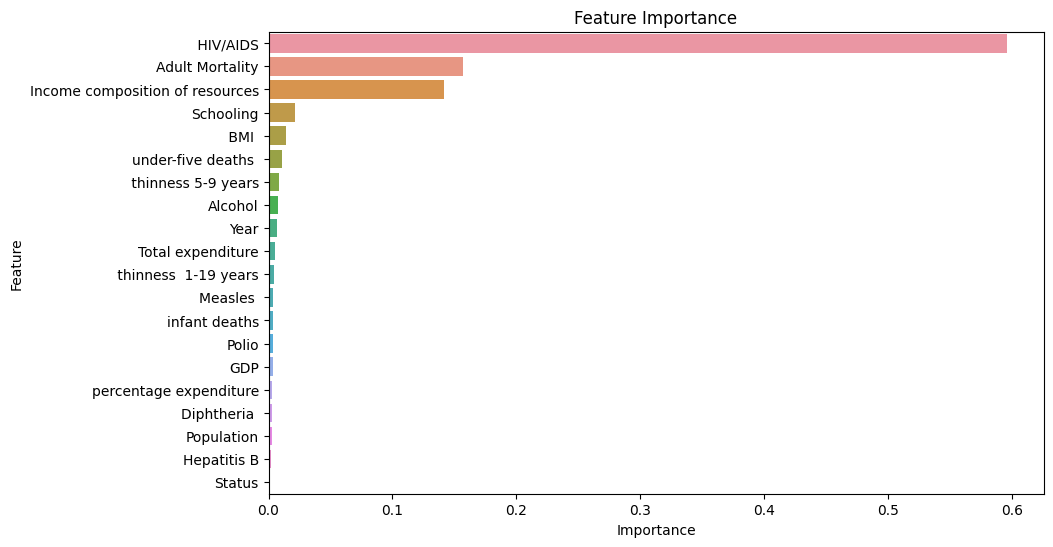

In [21]:
if hasattr(best_estimator, 'feature_importances_'):
    feature_importance = best_estimator.feature_importances_
    feature_names = X.columns

    # Create a DataFrame for feature importance
    feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importance})
    feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

    # Plot feature importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
    plt.title('Feature Importance')
    plt.show()
else:
    # If the model does not have feature_importances_ attribute, use permutation importance
    result = permutation_importance(best_estimator, X, y, n_repeats=10, random_state=42, n_jobs=-1)

    # Create a DataFrame for permutation importance
    perm_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': result.importances_mean})
    perm_importance_df = perm_importance_df.sort_values(by='Importance', ascending=False)

    # Plot permutation importance
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Importance', y='Feature', data=perm_importance_df)
    plt.title('Permutation Feature Importance')
    plt.show()

### Saving the model

In [22]:
import joblib

random_forest_regressor = 'best_model.joblib'
joblib.dump(best_estimator, random_forest_regressor)

print(f"Model saved to {random_forest_regressor}")

Model saved to best_model.joblib
